##ΜΕΡΟΣ 1



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('wine-missing.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


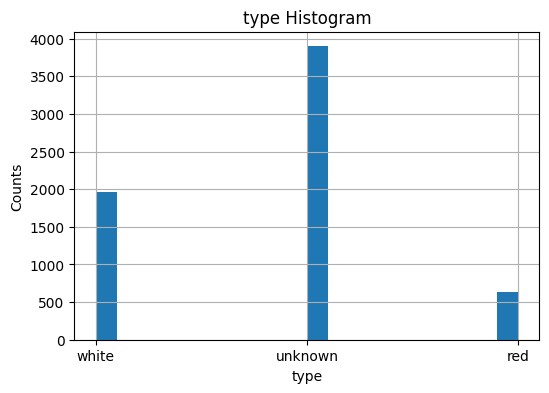

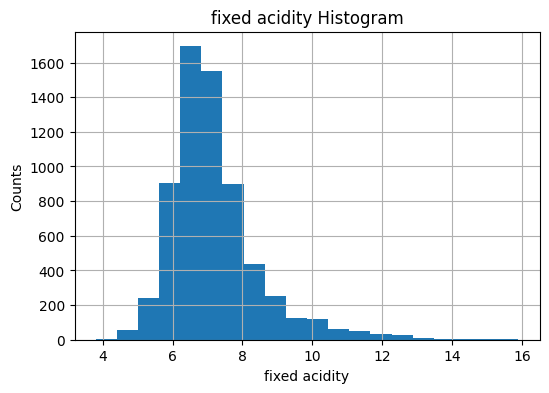

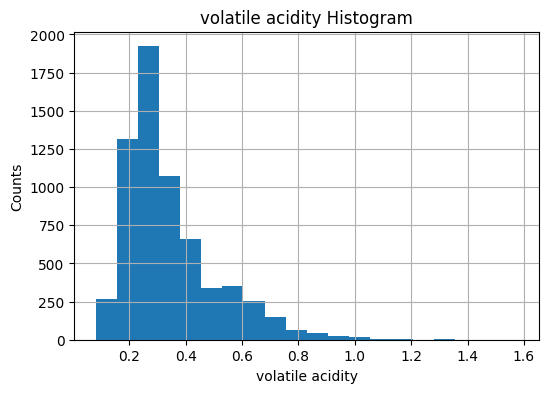

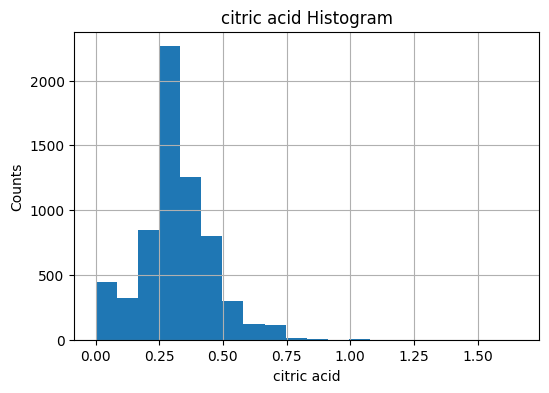

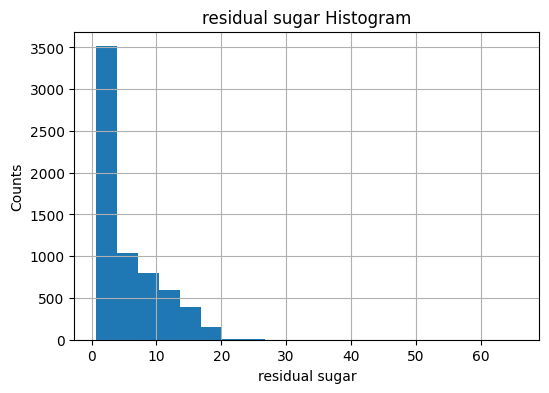

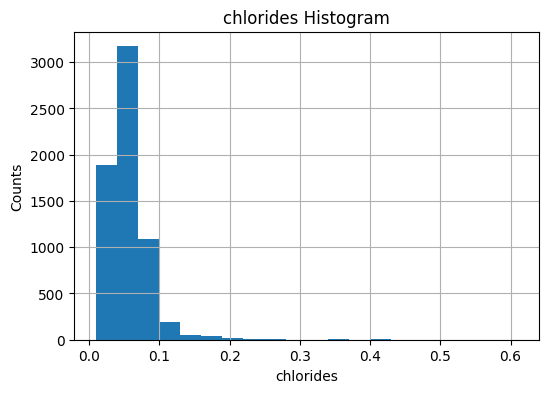

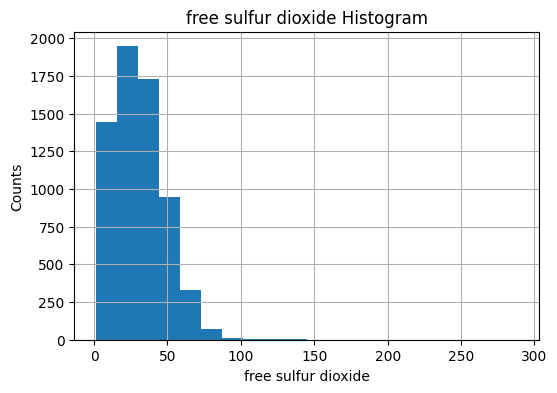

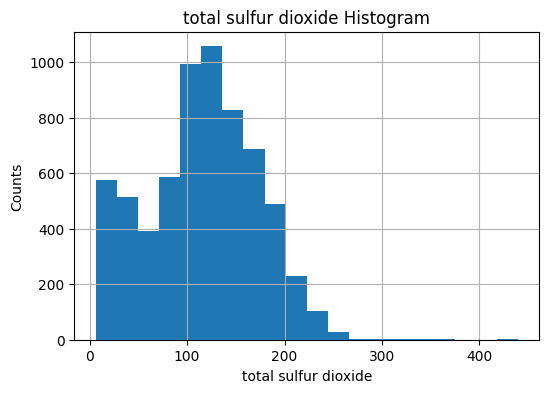

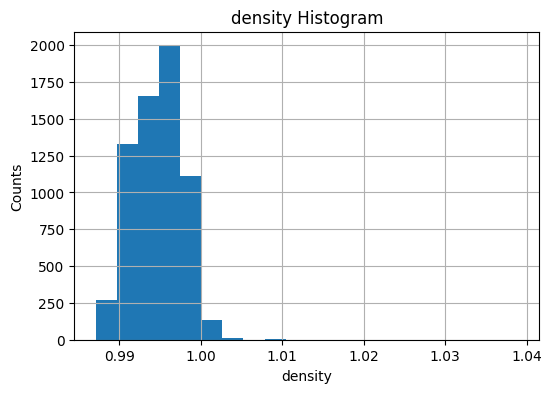

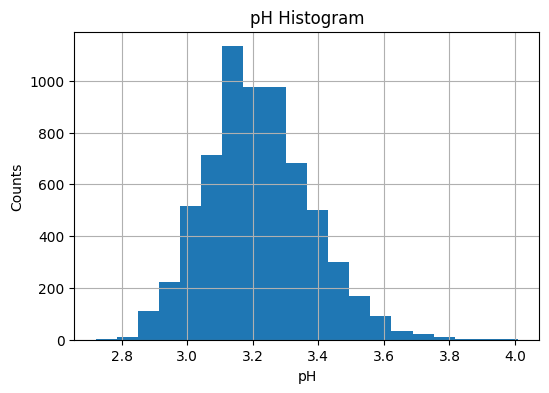

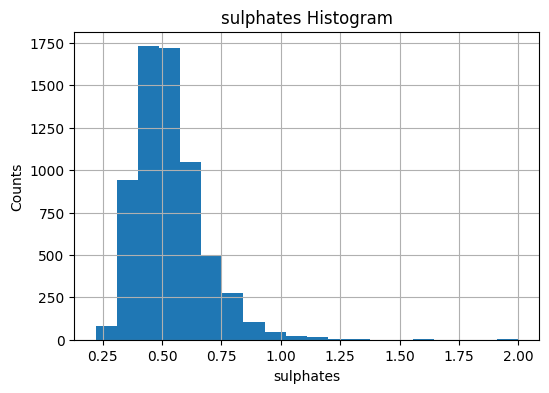

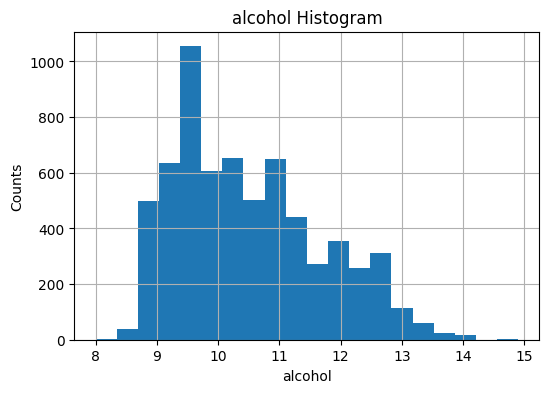

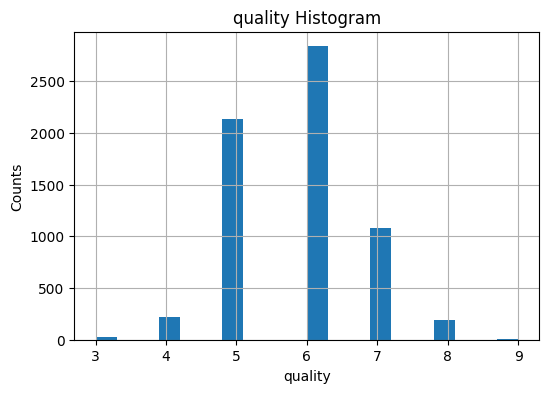

In [ ]:
for column in df.columns[:]:
    plt.figure(figsize=(6, 4))
    df[column].hist(bins=20)
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.show()

Παρατηρούμε ότι σχεδόν όλες οι συνεχείς μεταβλητές ακολουθούν την εκθετική κατανομή εκτός από την μεταβλητή ph που φαίνεται να ακολουθεί την κανονική κατανομή. Η μεταβλητή free sulfur dioxide φαίνεται να έχει μεγάλη τυπική απόκλιση και εμφανίζει ακραιες τιμές. Επίσης κάποιες μεταβλητές όπως fixed acidity, volatile acidity, citric acid και ph έχουν κάποια missing values ώστόσο η ποιότητα των δεδομένων φαίνεται να είναι ικανοποιητική.

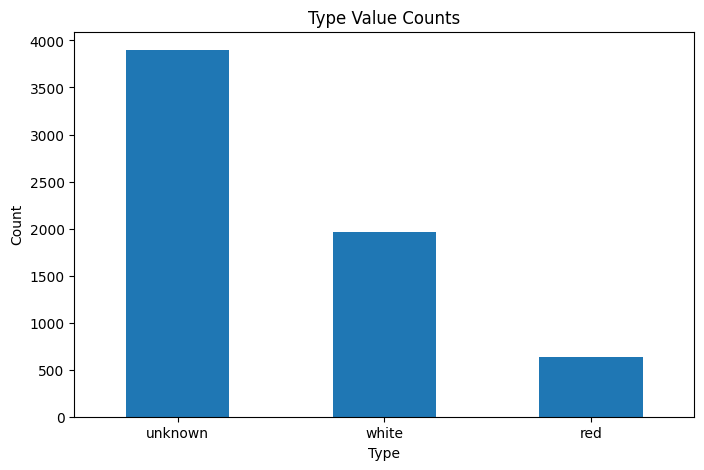

In [ ]:
df['type'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('Type Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Η μεταβλητή type αποτελείται από 3 κατηγορίες, red για τα κόκκινα κρασιά, white για τα λευκά κρασιά και unknown για τα κρασιά που είναι είτε κόκκινα είτε λευκά. Παρατηρούμε ότι πλήθος των κρασιών της κατηγορίας unknown είναι πολύ μεγαλύτερο σε σχέση με των άλλων δύο. Αυτό μπορεί να έχει σαν αποτέλεσμα το μοντέλο που θα εκπαιδεύσουμε να κάνει overfitting και να προβλέπει μόνο αυτή την κατηγορία με μεγάλη ακρίβεια ενώ να παραβλέπει τις άλλες δύο.

In [ ]:
mapping = {"white": 0, "red": 1, "unknown": 2}
df["type"] = df["type"].map(mapping)

x = df.drop(columns=["type"]).to_numpy()
y = df["type"].to_numpy()

print(x.shape, y.shape)

(6497, 12) (6497,)


In [ ]:
df_known = df[df["type"].isin([0, 1])]

x_known = df_known.drop(columns=["type"]).to_numpy()
y_known = df_known["type"].to_numpy()

df_unknown = df[df["type"] == 2]

x_unknown = df_unknown.drop(columns=["type"]).to_numpy()

print("x_known:", x_known.shape)
print("y_known:", y_known.shape)
print("x_unknown:", x_unknown.shape)

x_known: (2599, 12)
y_known: (2599,)
x_unknown: (3898, 12)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_known,y_known,test_size=0.30,random_state=42,stratify=y_known)

print("Train shapes:", x_train.shape, y_train.shape)
print("Test shapes:", x_test.shape, y_test.shape)

Train shapes: (1819, 12) (1819,)
Test shapes: (780, 12) (780,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("=== TRAIN SET ===")
print("Accuracy:", acc_train)
print("Precision:", prec_train)
print("Recall:", rec_train)
print("F1-score:", f1_train)

print("\n=== TEST SET ===")
print("Accuracy:", acc_test)
print("Precision:", prec_test)
print("Recall:", rec_test)
print("F1-score:", f1_test)

=== TRAIN SET ===
Accuracy: 0.999450247388675
Precision: 0.9977728285077951
Recall: 1.0
F1-score: 0.9988851727982163

=== TEST SET ===
Accuracy: 0.9987179487179487
Precision: 0.9948186528497409
Recall: 1.0
F1-score: 0.9974025974025974


In [ ]:
cr = print(classification_report(y_test, y_pred_test, digits=4))
cr

              precision    recall  f1-score   support

           0     1.0000    0.9983    0.9991       588
           1     0.9948    1.0000    0.9974       192

    accuracy                         0.9987       780
   macro avg     0.9974    0.9991    0.9983       780
weighted avg     0.9987    0.9987    0.9987       780



In [ ]:
cm = print(confusion_matrix(y_test, y_pred_test))
cm

[[587   1]
 [  0 192]]


Παρατηρουμε ότι ο ταξινομητής μας προβλέπει σωστά το είδος του κρασιού (κόκκινο/λευκό). Στη συγκεκριμένη περίπτωση, παρόλο που υπάρχει ανισορροπία μεταξύ των κλάσεων (588 λευκά και 192 κόκκινα) και κανονικά σε αυτές τις περιπτώσεις η μετρική F1 είναι αυτή που μας δείχνει την πραγματική εικόνα του ταξινομητή, μπορούμε να πούμε ότι και οι δύο μετρικές είναι αντιπροσωπευτικές αφού τα false positive είναι 1 και τα false negative 0.

In [ ]:
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(x_train, y_train)

y_pred_train = rf_balanced.predict(x_train)
y_pred_test = rf_balanced.predict(x_test)

acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("=== TRAIN SET ===")
print("Accuracy:", acc_train)
print("Precision:", prec_train)
print("Recall:", rec_train)
print("F1-score:", f1_train)

print("\n=== TEST SET ===")
print("Accuracy:", acc_test)
print("Precision:", prec_test)
print("Recall:", rec_test)
print("F1-score:", f1_test)

=== TRAIN SET ===
Accuracy: 0.999450247388675
Precision: 0.9977728285077951
Recall: 1.0
F1-score: 0.9988851727982163

=== TEST SET ===
Accuracy: 0.9948717948717949
Precision: 0.9947368421052631
Recall: 0.984375
F1-score: 0.9895287958115183


In [ ]:
cr = print(classification_report(y_test, y_pred_test, digits=4))
cr

              precision    recall  f1-score   support

           0     0.9949    0.9983    0.9966       588
           1     0.9947    0.9844    0.9895       192

    accuracy                         0.9949       780
   macro avg     0.9948    0.9913    0.9931       780
weighted avg     0.9949    0.9949    0.9949       780



In [ ]:
cm = print(confusion_matrix(y_test, y_pred_test))
cm

[[587   1]
 [  3 189]]


Η παράμετρος class_weight καθορίζει τα βάρη των κλάσεων κατά την εκπαίδευση. Οι κλάσεις που εμφανίζονται πιο σπάνια στο σύνολο των δεδομένων παίρνουν μεγαλύτερο βάρος, ενώ αυτές που εμφανίζονται πιο συχνά μικρότερο. Το μοντέλο υπολογίζει τα βάρη αυτόματα ως αντίστροφα ανάλογα της συχνότητας κάθε κλάσης, ώστε να αντιμετωπίζεται η ανισορροπία δεδομένων. Αυτό βοηθάει το Random Forest να μην αγνοεί τις λιγότερο αντιπροσωπευμένες κλάσεις και να βελτιώνει την ακρίβεια πρόβλεψης για αυτές.

In [ ]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)
y_unknown_proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99]])

In [ ]:
y_unknown_pred = np.full(len(x_unknown), 2, dtype=int)

red_proba = y_unknown_proba[:, 0]

y_unknown_pred[red_proba > 0.65] = 1
y_unknown_pred[red_proba < 0.35] = 0
y_unknown_pred.shape

(3898,)

In [ ]:
mask = y_unknown_pred != 2
x_mask = x_unknown[mask]
y_mask = y_unknown_pred[mask]
y_mask.shape

(3847,)

In [ ]:
x_mask = np.vstack([x_train, x_mask])
y_mask = np.concatenate([y_train, y_mask])

In [ ]:
rf_mask = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_mask.fit(x_mask, y_mask)

y_train_pred = rf_mask.predict(x_train)
y_test_pred = rf_mask.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.8840021990104453
Test Accuracy: 0.15128205128205127


In [ ]:
cr = print(classification_report(y_test, y_test_pred, digits=4))
cr

              precision    recall  f1-score   support

           0     0.3471    0.1429    0.2024       588
           1     0.0632    0.1771    0.0932       192

    accuracy                         0.1513       780
   macro avg     0.2052    0.1600    0.1478       780
weighted avg     0.2772    0.1513    0.1755       780



In [ ]:
x_unknown_remaining = x_unknown.copy()

while True:
    y_unknown_proba = rf.predict_proba(x_unknown_remaining)[:, 1]

    y_unknown_pred = np.full(len(x_unknown_remaining), 2, dtype=int)
    y_unknown_pred[y_unknown_proba > 0.65] = 1
    y_unknown_pred[y_unknown_proba < 0.35] = 0

    mask_confident = y_unknown_pred != 2
    if mask_confident.sum() == 0:
        break

    x_confident = x_unknown_remaining[mask_confident]
    y_confident = y_unknown_pred[mask_confident]

    x_augmented = np.vstack([x_train, x_confident])
    y_augmented = np.concatenate([y_train, y_confident])

    rf = RandomForestClassifier(random_state=42, class_weight='balanced')
    rf.fit(x_augmented, y_augmented)

    x_unknown_remaining = x_unknown_remaining[~mask_confident]

final_model = rf

In [ ]:
x_augmented.shape

(1821, 12)

In [ ]:
y_pred_train = rf.predict(x_augmented)
y_pred_test = rf.predict(x_test)

In [ ]:
cr = print(classification_report(y_test, y_pred_test, digits=4))
cr

              precision    recall  f1-score   support

           0     0.9966    0.9983    0.9975       588
           1     0.9948    0.9896    0.9922       192

    accuracy                         0.9962       780
   macro avg     0.9957    0.9939    0.9948       780
weighted avg     0.9962    0.9962    0.9962       780



##ΜΕΡΟΣ 2

In [ ]:
df = pd.read_csv('wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


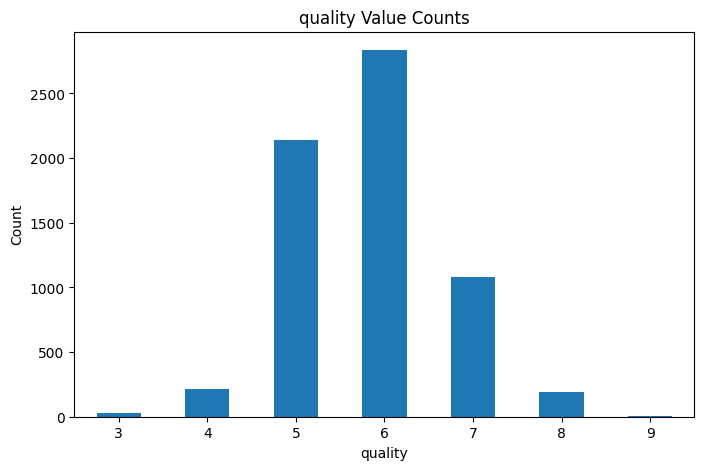

In [ ]:
counts=df['quality'].value_counts().sort_index()
counts.plot(kind='bar', figsize=(8, 5))
plt.title('quality Value Counts')
plt.xlabel('quality')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Η ανάλυση της κατανομής των βαθμολογιών ποιότητας των κρασιών δεν είναι ομοιόμορφη. Συγκεκριμένα, οι βαθμολογίες 5, 6 και 7 εμφανίζονται με πολύ μεγαλύτερη συχνότητα σε σχέση με τις χαμηλότερες 3, 4 και υψηλότερες 8, 9 τιμές. Η μη ομοιόμορφη αυτή κατανομή υποδηλώνει ότι το σύνολο δεδομένων δεν είναι ισορροπημένο, γεγονός που μπορεί να επηρεάσει την απόδοση και την αξιοπιστία των μοντέλων ταξινόμησης.

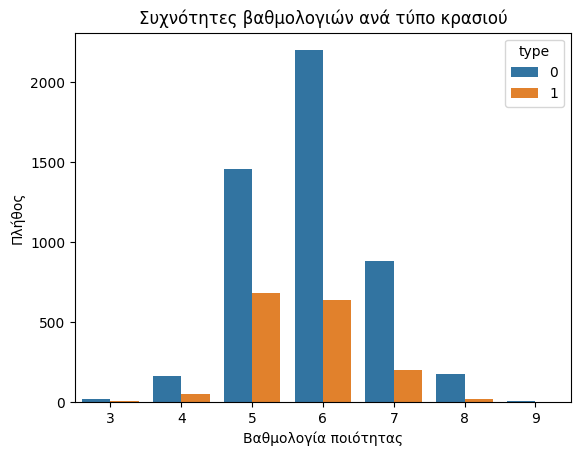

In [ ]:
import seaborn as sns
sns.countplot(x='quality', hue='type', data=df)
plt.title('Συχνότητες βαθμολογιών ανά τύπο κρασιού')
plt.xlabel('Βαθμολογία ποιότητας')
plt.ylabel('Πλήθος')
plt.show()

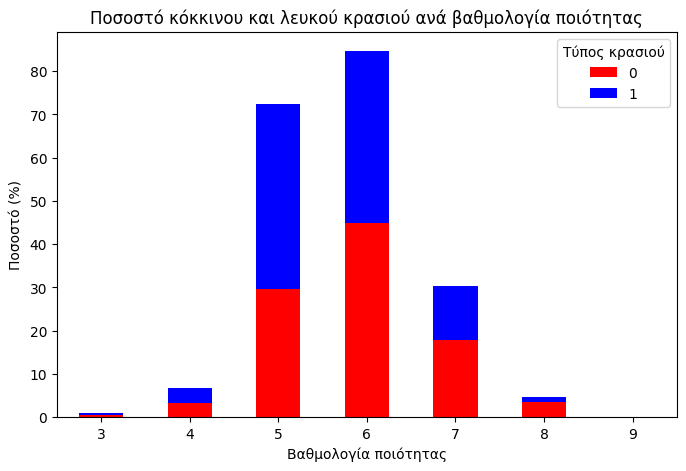

In [ ]:
percentage = df.groupby(['quality', 'type']).size().unstack().fillna(0)

totals = df['type'].value_counts()
percentage = percentage.div(totals) * 100

percentage.plot(kind='bar', stacked=True, figsize=(8,5), color=['red', 'blue'])
plt.title('Ποσοστό κόκκινου και λευκού κρασιού ανά βαθμολογία ποιότητας')
plt.xlabel('Βαθμολογία ποιότητας')
plt.ylabel('Ποσοστό (%)')
plt.xticks(rotation=0)
plt.legend(title='Τύπος κρασιού')
plt.show()

Παρατηρούμε ότι παρόλο που στο ραβδόγραμμα φαίνεται ότι το άσπρο κρασί έχει καλύτερη ποιότητα από το κόκκινο, αν κανονικοποιήσουμε την μεταβλητή μας θα δούμε ότι τελικά το ποσοστό των κόκκινων κρασιών είναι μεγαλύτερο από αυτό των λευκών κρασιών, καθώς η ποιότητα αυξάνεται.

In [ ]:
mean_sugar = df['residual sugar'].mean()

df['sugar_binary'] = (df['residual sugar'] > mean_sugar).astype(int)

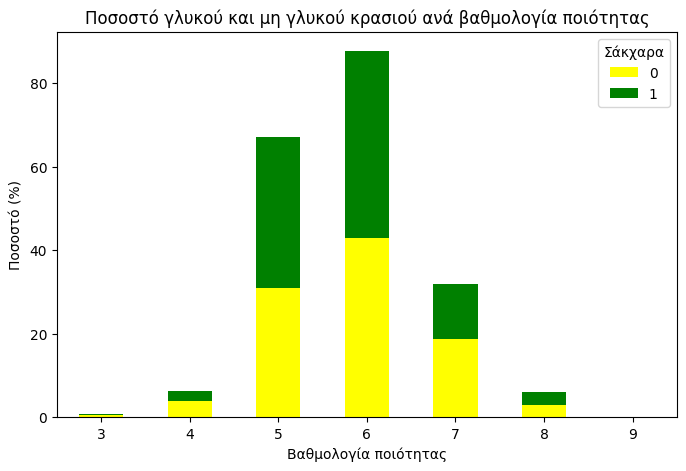

In [ ]:
percentage = df.groupby(['quality', 'sugar_binary']).size().unstack().fillna(0)

totals = df['sugar_binary'].value_counts()
percentage = percentage.div(totals) * 100

percentage.plot(kind='bar', stacked=True, figsize=(8,5), color=['yellow', 'green'])
plt.title('Ποσοστό γλυκού και μη γλυκού κρασιού ανά βαθμολογία ποιότητας')
plt.xlabel('Βαθμολογία ποιότητας')
plt.ylabel('Ποσοστό (%)')
plt.xticks(rotation=0)
plt.legend(title='Σάκχαρα')
plt.show()

Κανονικοποιήσαμε την μεταβλητή residual_sugar αφού πρώτα την μετατρέψαμε σε δυαδική 0 και 1, όπου το 0 είναι για τα ξηρά και το 1 για τα γλυκά. Παρατηρούμε ότι η αναλογία μεταξύ ξηρού και γλυκού κρασιού είναι περίπου ίδια στις διάφορες ποιότητες των κρασιών εκτός από τις μεγάλες τιμές ποιότητας 7 και 8 όπου φαίνεται ότι το ποσοστό του ξηρού κρασιού να είναι λίγο υψηλότερο από αυτό του γλυκού.

In [ ]:
mapping = {"white": 0, "red": 1, "unknown": 2}
df["type"] = df["type"].map(mapping)

x = df.drop(columns=["quality"]).to_numpy()
y = df["quality"].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error

dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) στο test set:", mae)

Mean Absolute Error (MAE) στο test set: 0.44769230769230767


In [ ]:
mae_list = []

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)

    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(x_train, y_train)

    y_pred = regressor.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

mean_mae = np.mean(mae_list)
std_mae = np.std(mae_list)

print(f"Μέσο MAE:",mean_mae)
print(f"Τυπική απόκλιση MAE:",std_mae)

Μέσο MAE: 0.4661538461538462
Τυπική απόκλιση MAE: 0.026832815729997475


In [ ]:
mae_list

[0.44769230769230767,
 0.5,
 0.4338461538461538,
 0.4707692307692308,
 0.5046153846153846,
 0.4338461538461538,
 0.48923076923076925,
 0.46615384615384614,
 0.4307692307692308,
 0.4846153846153846]

Ο υπολογισμός του μέσου όρου και της τυπικής απόκλισης του MAE από 10 διαφορετικά τυχαία seeds μάς επιτρέπει να εκτιμήσουμε πόσο σταθερή είναι η απόδοση του μοντέλου και πόσο εξαρτάται από το συγκεκριμένο train–test split. Ο μέσος όρος MAE δίνει μια πιο αξιόπιστη εκτίμηση του αναμενόμενου σφάλματος σε νέα δεδομένα, ενώ η τυπική απόκλιση δείχνει πόσο κυμαίνεται το σφάλμα ανάλογα με το πώς χωρίζεται το dataset. Στη συγκεκριμένη περίπτωση, έχουμε μικρή τυπική απόκλιση και αυτό σημαίνει ότι το μοντέλο είναι σταθερό, ενώ αν είχαμε μεγάλη τυπική απόκλιση θα δήλωνε ευαισθησία και μειωμένη αξιοπιστία.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [ ]:
import itertools
max_depth_values = [3, 5, 7, 9]
ccp_values = [0, 0.001, 0.005, 0.01]
combinations = list(itertools.product(max_depth_values, ccp_values))[:16]

results = []

for max_depth, ccp_values in combinations:
    model = DecisionTreeRegressor(max_depth=max_depth, ccp_alpha=ccp_values, random_state=0)
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)

    results.append({
        'max_depth': max_depth,
        'ccp_values': ccp_values,
        'MAE_train': mae_train,
        'MAE_val': mae_val
    })

results_df = pd.DataFrame(results)
print(results_df)

    max_depth  ccp_values  MAE_train   MAE_val
0           3       0.000   0.584908  0.609461
1           3       0.001   0.584908  0.609461
2           3       0.005   0.586852  0.608415
3           3       0.010   0.599950  0.625798
4           5       0.000   0.545978  0.599920
5           5       0.001   0.546586  0.601035
6           5       0.005   0.573432  0.594551
7           5       0.010   0.599950  0.625798
8           7       0.000   0.487283  0.587785
9           7       0.001   0.510398  0.587328
10          7       0.005   0.573432  0.594551
11          7       0.010   0.599950  0.625798
12          9       0.000   0.405427  0.576606
13          9       0.001   0.502292  0.584969
14          9       0.005   0.573432  0.594551
15          9       0.010   0.599950  0.625798


Στη συγκεκριμένη άσκηση έχουμε σπάσει τα δεδομένα μας σε train και test sets και στη συνέχεια το train set το χωρίσαμε σε train set και validation set. Tο μοντέλο μας εκπαιδεύεται στο train set και χρησιμοποιεί το validation set για να δει πόσο καλές είναι οι προβλεψεις και πόσο μπορεί να αλλάξουν όταν αλλάζουν και οι παράμετροι του μοντέλου. Όμως το train και validation sets δε παύουν να είναι υποσύνολο του αρχικού μας train set. Γενικά το μοντέλο το εκπαιδεύουμε και βρίσκουμε τις βέλτιστες παραμέτρους στα γνωστά δεδομένα και στο test set, τα άγνωστα  δεδομένα, κοιτάμε μόνο να δούμε πόσο καλό είναι το μοντέλο μας.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

regressor = DecisionTreeRegressor(random_state=0)

param_grid = {'max_depth': [3, 5, 7, 9],'ccp_alpha': [0, 0.001, 0.005, 0.01]}

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=regressor,param_grid=param_grid,
    scoring=mae_scorer,cv=10,n_jobs=-1,verbose=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

grid_search.fit(x_train, y_train)

print("Καλύτερος συνδυασμός παραμέτρων:", grid_search.best_params_)
print("Καλύτερη μέση MAE (cross-validation):", -grid_search.best_score_)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(x_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("MAE στο test set:", test_mae)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Καλύτερος συνδυασμός παραμέτρων: {'ccp_alpha': 0, 'max_depth': 9}
Καλύτερη μέση MAE (cross-validation): 0.5544533129027857
MAE στο test set: 0.5348192466206719


Η πιο αξιόπιστη μεθοδολογία για την επιλογή υπερπαραμέτρων είναι αυτή του ερωτήματος 9, δηλαδή το 10-fold cross-validation. Σε αντίθεση με το ερώτημα 6, όπου η αξιολόγηση βασίζεται σε ένα μοναδικό train–validation split, το cross-validation δε χρησιμοποιεί ένα μόνο τυχαίο δείγμα αλλά σπάει το train set σε 10 υποσύνολα και κλαθε φορά χρησιμοποιεί τα 9 για εκπαίδευση και το 1 για validation. Με αυτόν τον τρόπο το μοντέλο μσθσίνει τα δεδομένα και υπολογίζει τον μέσο όρο του σφάλματος. Έτσι, παρέχει πιο σταθερή και αντιπροσωπευτική εκτίμηση της αναμενόμενης απόδοσης του μοντέλου. Επιπλέον, είναι πιο αξιόπιστο και από το ερώτημα 7, όπου αλλάζει μόνο το seed, επειδή το cross-validation εξετάζει συστηματικά πολλές διαφορετικές διαμορφώσεις train-validation, όχι απλώς πολλούς τυχαίους διαχωρισμούς. Συνεπώς, το ερώτημα 9 προσφέρει τη λιγότερη πιθανότητα overfitting στις υπερπαραμέτρους στο test set.

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

regressor = DecisionTreeRegressor(max_depth=5, random_state=0)

param_grid = {'ccp_alpha': [0, 0.001, 0.005, 0.01]}
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
grid_search = GridSearchCV(estimator=regressor,param_grid=param_grid,
    scoring=mae_scorer,cv=10,n_jobs=-1,verbose=1)

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
print("Καλύτερες παράμετροι:", grid_search.best_params_)
print("Μέσο MAE (CV):", -grid_search.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Καλύτερες παράμετροι: {'ccp_alpha': 0}
Μέσο MAE (CV): 0.5668091119767175


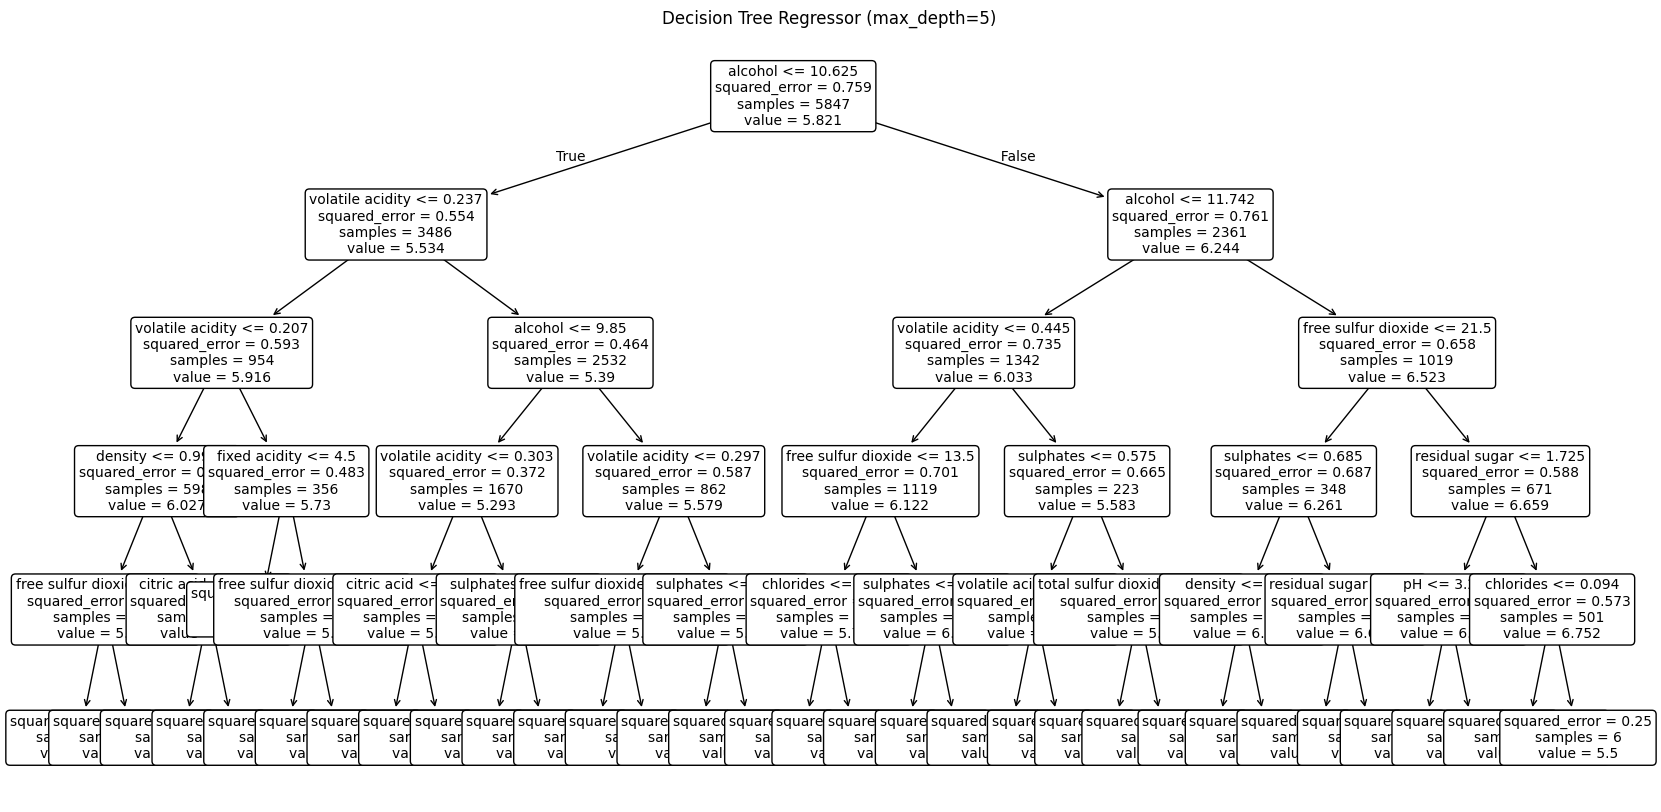

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=df.drop(columns=['quality']).columns, rounded=True, fontsize=10)
plt.title("Decision Tree Regressor (max_depth=5)")
plt.show()

Text(0.5, 1.0, 'Σημαντικότητα Χαρακτηριστικών στο Decision Tree')

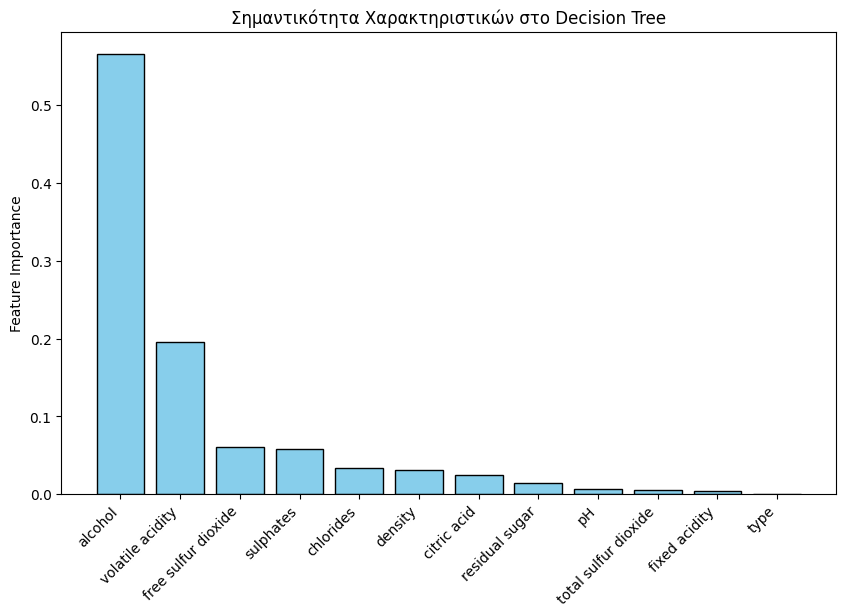

In [ ]:
feature_names = df.drop('quality', axis=1).columns

importances = best_model.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], color='skyblue', edgecolor='k')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('Σημαντικότητα Χαρακτηριστικών στο Decision Tree')

In [ ]:
from sklearn.tree import export_text

rules = export_text(best_model, feature_names=list(df.drop(columns=['quality']).columns))
print(rules)

|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- density <= 1.00
|   |   |   |   |--- free sulfur dioxide <= 6.50
|   |   |   |   |   |--- value: [4.50]
|   |   |   |   |--- free sulfur dioxide >  6.50
|   |   |   |   |   |--- value: [5.93]
|   |   |   |--- density >  1.00
|   |   |   |   |--- citric acid <= 0.31
|   |   |   |   |   |--- value: [7.07]
|   |   |   |   |--- citric acid >  0.31
|   |   |   |   |   |--- value: [6.07]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- fixed acidity <= 4.50
|   |   |   |   |--- value: [3.00]
|   |   |   |--- fixed acidity >  4.50
|   |   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |   |--- value: [5.44]
|   |   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |   |--- value: [5.80]
|   |--- volatile acidity >  0.24
|   |   |--- alcohol <= 9.85
|   |   |   |--- volatile acidity <= 0.30
|   |   |   |   |--- citric acid <= 0.27
|   |   |   |   |   |--- valu

Από το σύνολο των κανόνων και την συμαντικότητα των χαρακτηριστικών μπορούμε να παρατηρήσουμε ότι ένας από τους παράγοντες που επηρεάζει την ποιότητα των κρασιών είναι η αλκοόλη.Το πόσο σημαντική στην πρόβλεψη είναι αυτή η μεταβλητή φαίνεται και από το γράφημα που αναπαριστά την σημαντικότητα των χαρακτηριστικών. Άλλα χαρατηριστικά είναι η πτητική οξύτητα και τα υπολειπόμενα σάκχαρα. Τα κρασιά με υψηλότερη αλκοόλη και μέτρια πτητική οξύτητα τείνουν να έχουν καλύτερη ποιότητα, ενώ τα πολύ όξινα ή πολύ χαμηλής αλκοόλης παρουσιάζουν χαμηλότερη ποιότητα. Επιπλέον, παράγοντες όπως τα free sulfur dioxide και τα sulphates επηρεάζουν την αξιολόγηση σε μεσαίες βαθμολογίες. Συνολικά, οι κανόνες δείχνουν ότι το κρασί έχει υψηλότερη ποιότητα όταν υπάρχει ισορροπία μεταξύ αλκοόλης, οξύτητας και σακχάρων, ενώ ακραίες τιμές σε οποιοδήποτε από αυτά τα χαρακτηριστικά μειώνουν την ποιότητα.